1 Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

def roulette(x):
  x = int(x)
  if x==0:
    return x, "zero"
  elif x%2 == 0:
    return  x, "red"
  else:
    return x, "black"

for i in range (0,10):
  print (roulette(np.random.uniform(0, 36)))

(17, 'black')
(18, 'red')
(12, 'red')
(10, 'red')
(32, 'red')
(22, 'red')
(15, 'black')
(14, 'red')
(11, 'black')
(32, 'red')


2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [2]:
# события "Красное" "Черное" и "Зеро" несовместны
# и потому сумма вероятностей наступления каждого из них
# должна составлять 1. Проверка
n = 10000
for attempt in range(0, 11):
    r, b, z = 0, 0, 0
    for i in range(0, n):
        x = np.random.uniform(0, 36)
        if roulette(x)[1] == "zero":
            z = z + 1
        if roulette(x)[1] == "black":
            b = b + 1
        if roulette(x)[1] == "red":
            r = r + 1
    print(r/n+b/n+z/n)

0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

Text(0.5, 1.0, 'Histogram')

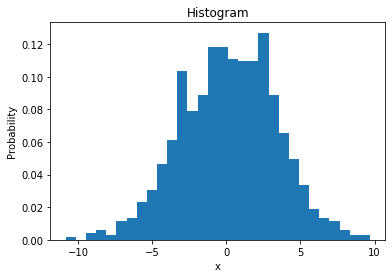

In [3]:
x = 0
for attempt in range(0, 11):
    x += np.random.randn(1000)
num_bins = 30
n, bins, patches = plt.hist(x, num_bins, density=1)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')

3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [4]:
import itertools
from math import factorial

m, l = 0, 10000
k = 2
n = 4  # количество испытаний
a = np.random.randint(0, 2, l)
b = np.random.randint(0, 2, l)
c = np.random.randint(0, 2, l)
d = np.random.randint(0, 2, l)
x = a + b + c + d
for i in range(0, l):
    if x[i] == k:
        m = m + 1
# print(a, b, c, d)
# print(x)
print("Вероятность методом Монте-Карло: ", m/l)
print("Вероятность по формуле Бернулли: ", factorial(
    n)/(factorial(k)*factorial(n-k))*1/(2**n))

Вероятность методом Монте-Карло:  0.3726
Вероятность по формуле Бернулли:  0.375


3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [5]:
import itertools
from math import factorial

m, l = 0, 10000
k = 7  # количество успехов
n = 10  # количество испытаний

for _ in range(n):
    if _ == 0:
        x = np.random.randint(0, 2, l)
    else:
        x += np.random.randint(0, 2, l)

for i in range(0, l):
    if x[i] == k:
        m = m + 1
print("Вероятность методом Монте-Карло: ", m/l)
print("Вероятность по формуле Бернулли: ", factorial(
    n)/(factorial(k)*factorial(n-k))*1/(2**n))

Вероятность методом Монте-Карло:  0.1173
Вероятность по формуле Бернулли:  0.1171875


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [6]:
obj = "123456"
n= len(obj)
k= 2

for p in itertools.permutations(obj,k):
    print(''.join(str(x) for x in p))

12
13
14
15
16
21
23
24
25
26
31
32
34
35
36
41
42
43
45
46
51
52
53
54
56
61
62
63
64
65


In [7]:
for p in itertools.combinations(obj,2):
    print(''.join(p))

12
13
14
15
16
23
24
25
26
34
35
36
45
46
56


5. Дополните код расчетом коэффициента корреляции x и y по формуле

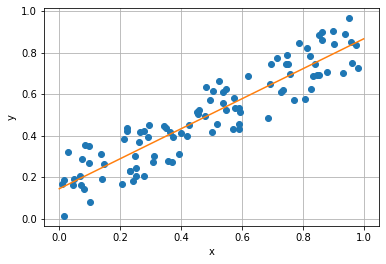

Корреляция посчитанная вручную:      0.9198353834515173
Корреляция посчитанная np.corrcoef:  0.9198353834515173


In [67]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y,rcond=None)[0]
plt.plot([0, 1], [b, a + b])
plt.show()

Xav = np.average(x)
Yav = np.average(y)
X = x-Xav
Y = y-Yav
R = sum(X*Y) / (sum(X**2)*sum(Y**2))**.5
print("Корреляция посчитанная вручную:     ",R)
print("Корреляция посчитанная np.corrcoef: ",np.corrcoef(x, y)[0,1])